In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [2]:
import PIL
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

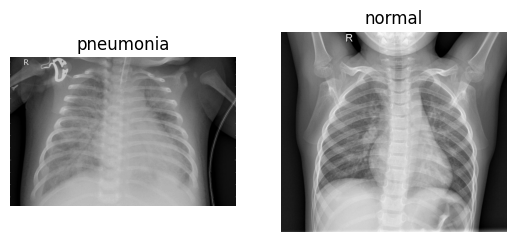

In [8]:
img_pneumonia=Image.open('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')
img_normal=Image.open('/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0115-0001.jpeg')

fig,x=plt.subplots(1,2)

x[0].imshow(img_pneumonia,cmap='gray')
x[0].set_title("pneumonia")
x[0].axis('off')

x[1].imshow(img_normal,cmap='gray')
x[1].set_title("normal")
x[1].axis('off')

plt.show()


In [4]:
train=image_dataset_from_directory('/kaggle/input/chest-xray-pneumonia/chest_xray/train')

Found 5216 files belonging to 2 classes.


In [5]:
test=image_dataset_from_directory('/kaggle/input/chest-xray-pneumonia/chest_xray/test')

Found 624 files belonging to 2 classes.


In [6]:
val=image_dataset_from_directory('/kaggle/input/chest-xray-pneumonia/chest_xray/val')

Found 16 files belonging to 2 classes.


In [7]:
from tensorflow.keras.layers import Rescaling

In [8]:
normalization_layer = Rescaling(1./255)

def normalize_data(image, label):
    image = normalization_layer(image)
    return image, label

train = train.map(normalize_data)
valid = val.map(normalize_data)
test = test.map(normalize_data)

In [9]:
from tensorflow.keras.models import Sequential

In [24]:
model=Sequential()

In [11]:
from tensorflow.keras import layers

In [26]:
model.add(layers.Input((256,256,3)))

In [27]:
model.add(layers.Conv2D(32,(3,3),activation='relu'))

In [28]:
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [29]:
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.2))

In [30]:
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.2))

In [31]:
model.add(layers.Flatten(input_shape=(256,256)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 252, 252, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 124, 124, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 122, 122, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 61, 61, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 61, 61, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 476288)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    60,964,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,215,137 (233.52 MB)

 Trainable params: 61,215,137 (233.52 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
with tf.device('/gpu:0'):
    model.fit(train,validation_data=valid,epochs=5)

Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 232ms/step - accuracy: 0.7743 - loss: 1.5162 - val_accuracy: 0.9375 - val_loss: 0.2786
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 34s 206ms/step - accuracy: 0.9385 - loss: 0.1632 - val_accuracy: 0.9375 - val_loss: 0.1648
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 34s 207ms/step - accuracy: 0.9663 - loss: 0.0994 - val_accuracy: 1.0000 - val_loss: 0.1156
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 34s 206ms/step - accuracy: 0.9689 - loss: 0.0882 - val_accuracy: 0.8750 - val_loss: 0.2233
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 34s 206ms/step - accuracy: 0.9791 - loss: 0.0546 - val_accuracy: 0.9375 - val_loss: 0.1344


In [36]:
model.evaluate(test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7416 - loss: 1.1861


[1.143296241760254, 0.7403846383094788]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


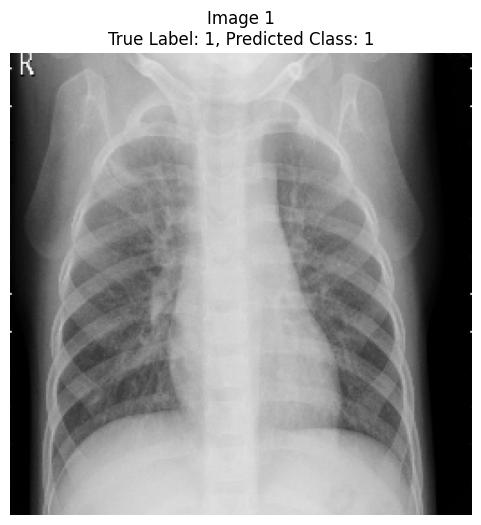

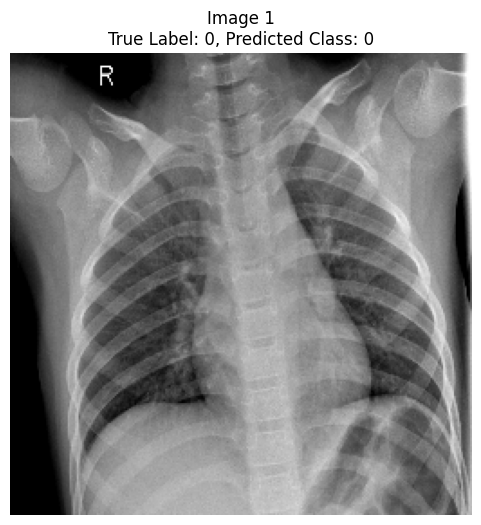

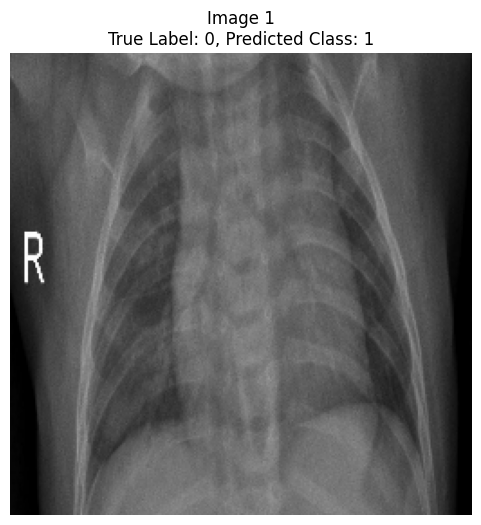

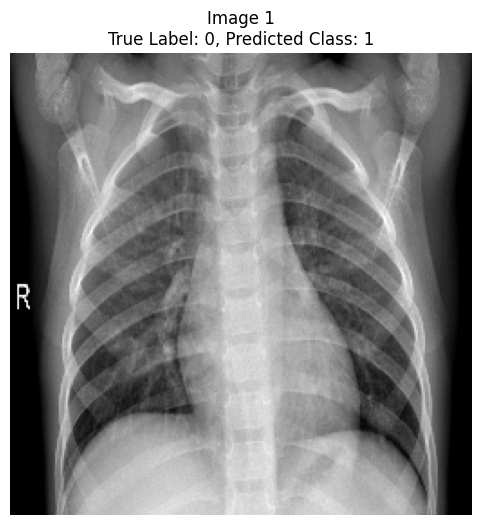

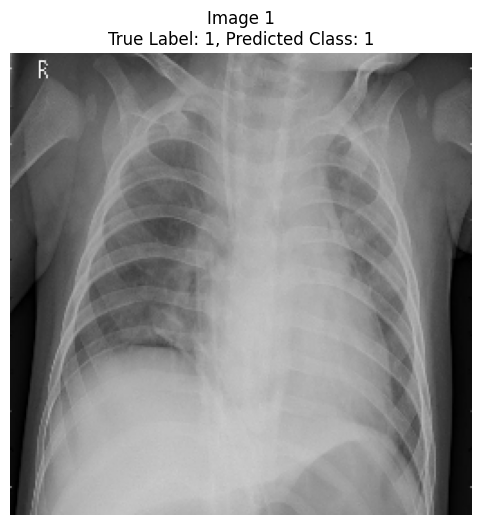

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


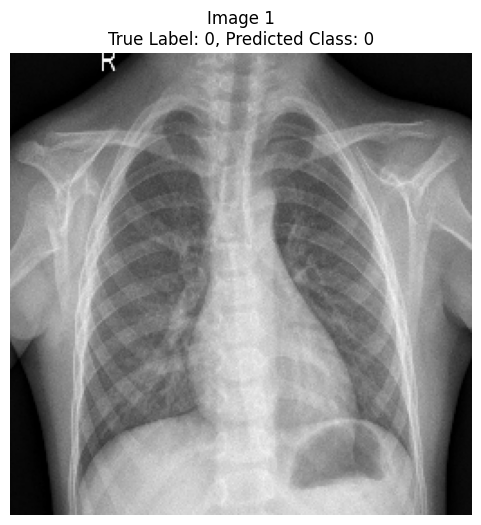

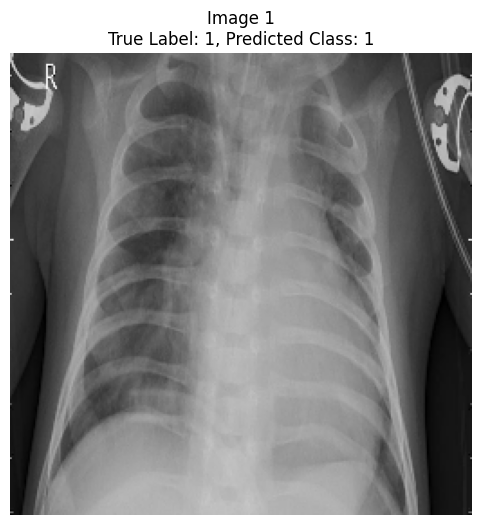

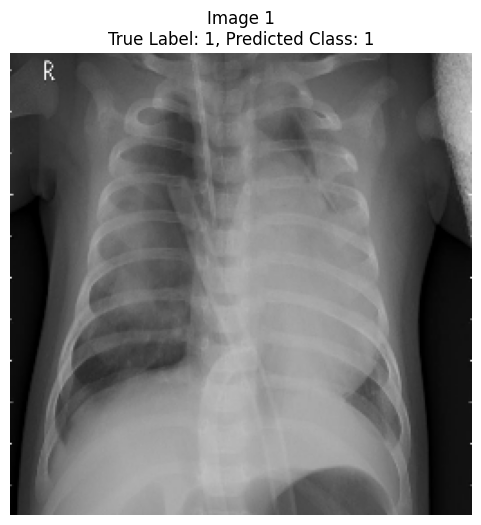

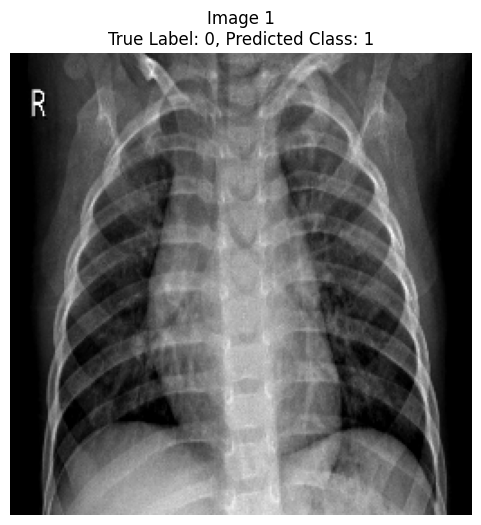

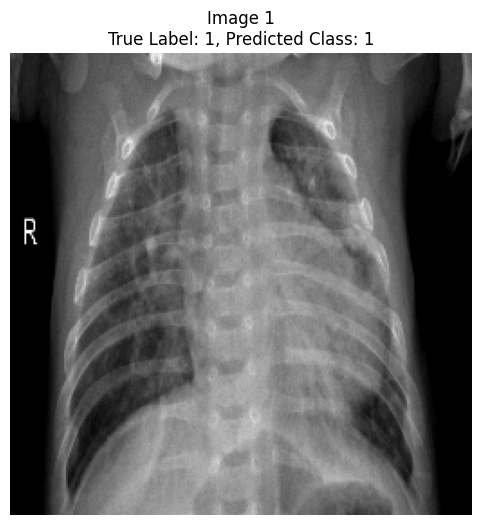

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


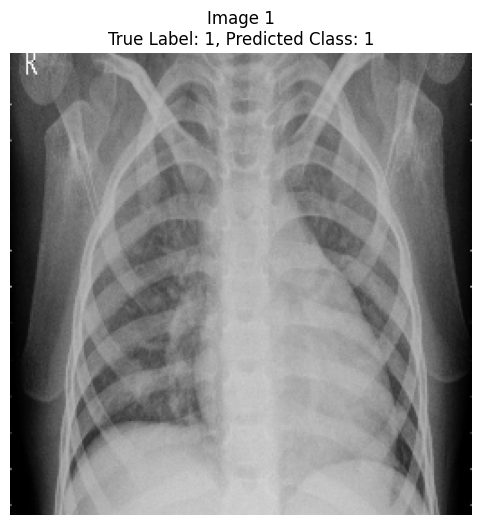

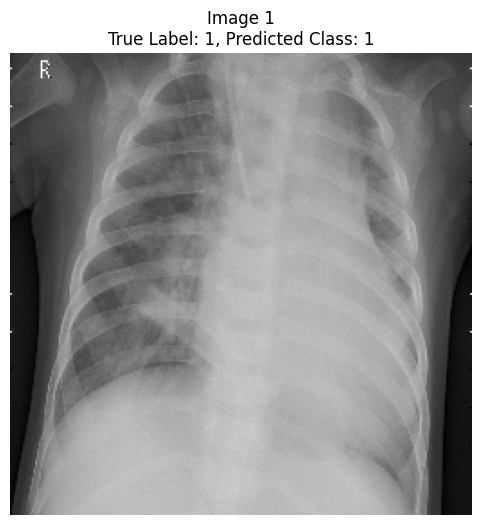

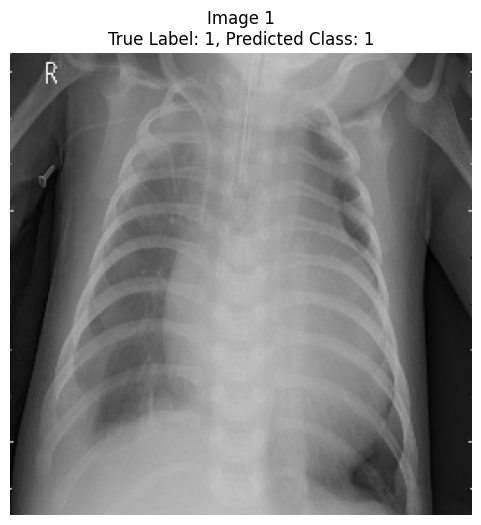

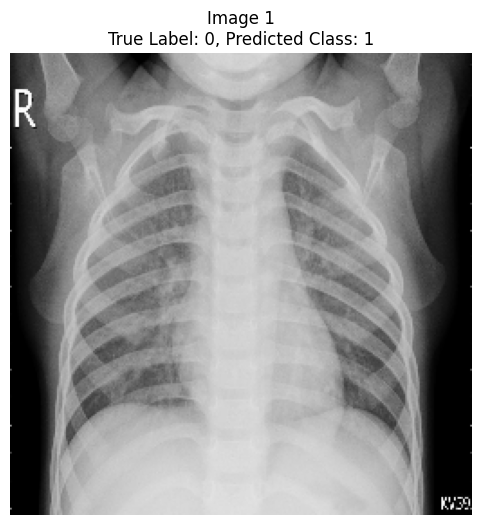

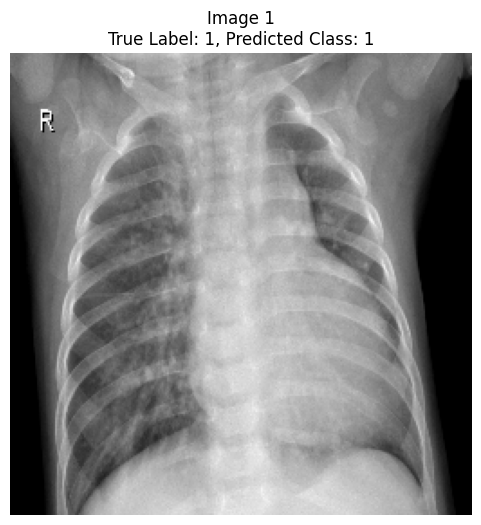

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


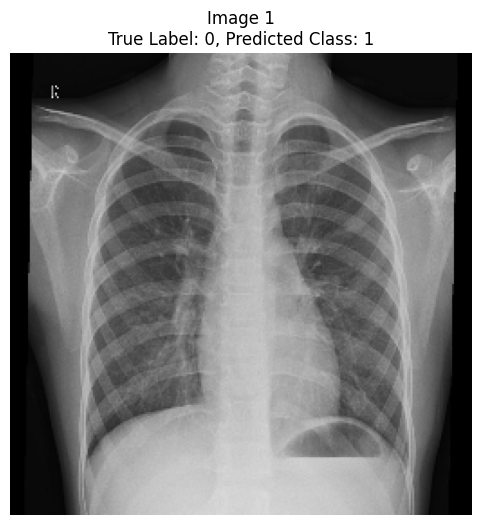

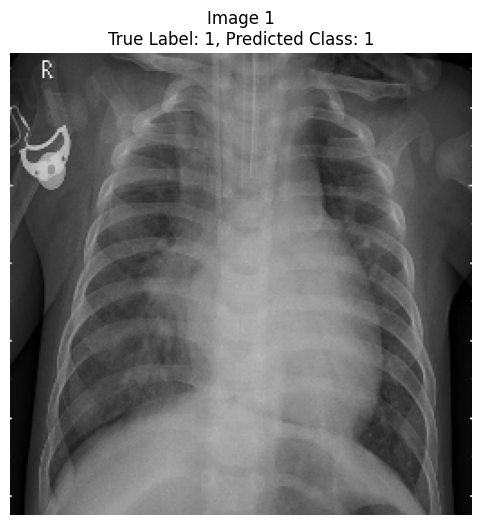

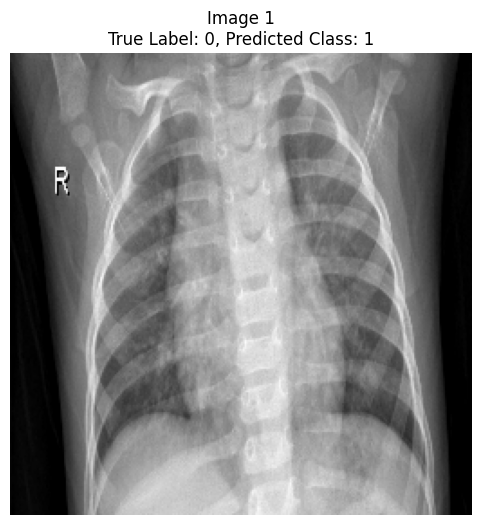

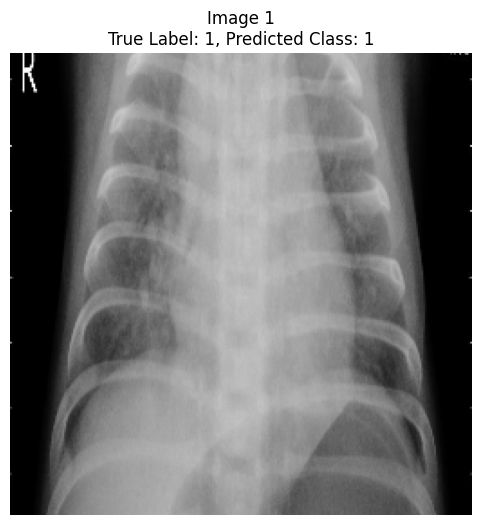

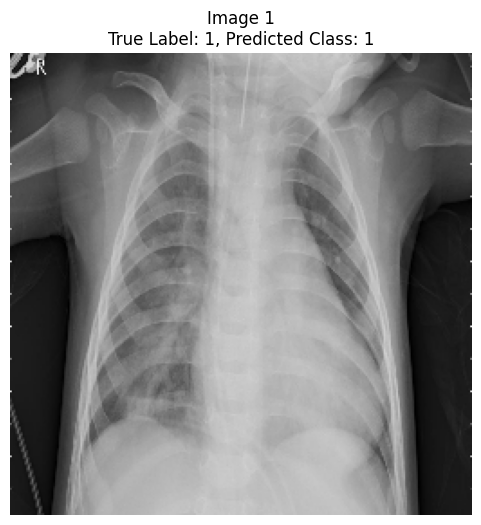

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


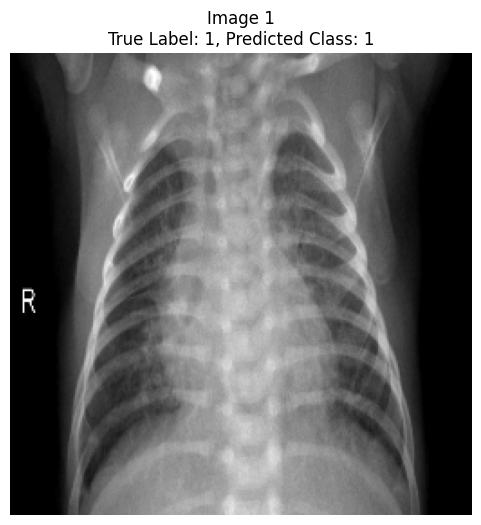

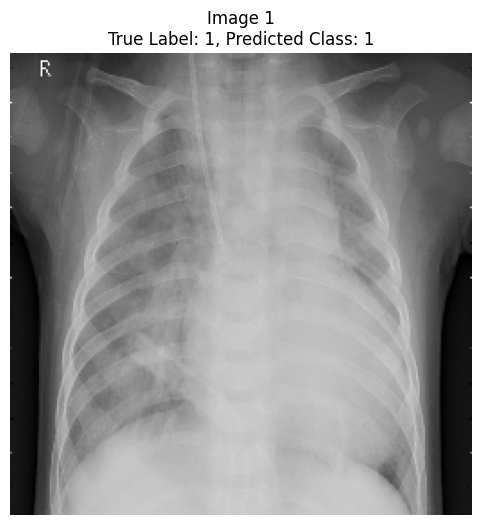

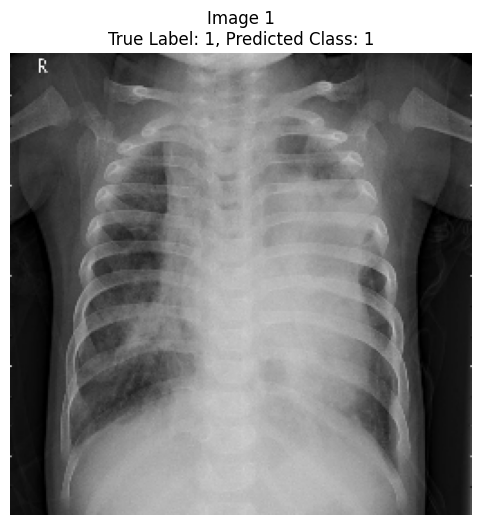

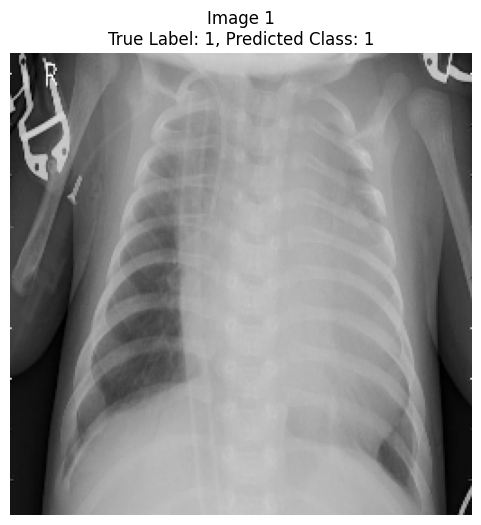

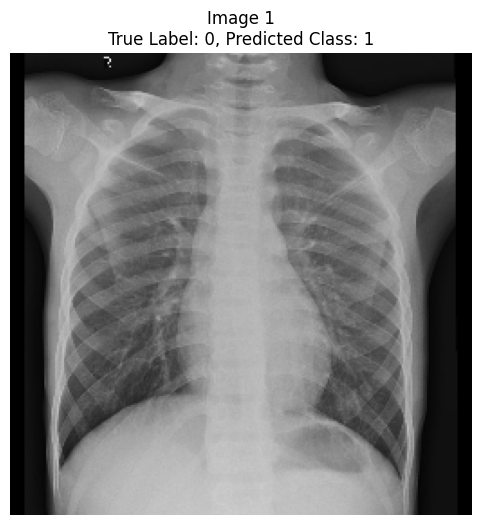

In [47]:
prediction_index = 0
for j,batch in enumerate(test):
    if j==5:
        break
    else:
        images,labels=batch
        predictions=model.predict(images)

        for i in range(5):
            img=images[i].numpy()
            if img.max() <= 1.0:
                img = (img * 255).astype('uint8')
            pred_class = (predictions[i] > 0.5).astype(int).item()
            true_label = labels[i].numpy()
            plt.figure(figsize=(6, 6))
            plt.imshow(img)
            plt.title(f"Image {prediction_index + 1}\nTrue Label: {true_label}, Predicted Class: {pred_class}")
            plt.axis('off')
            plt.show()
        
        